【問題1】データの可視化

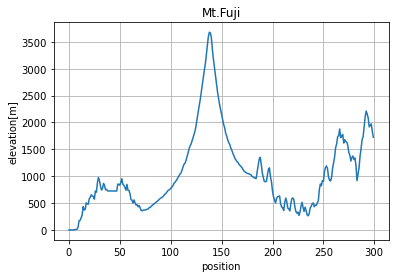

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#print(fuji[130:140])

bangou_nda =[]
for i in range(300):
    bangou_nda.append(fuji[i,0])
hyouko_nda =[]
for j in range(300):
    hyouko_nda.append(fuji[j,3])


import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
#plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [3]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[99:102])

bangou_nda =[]
for i in range(300):
    bangou_nda.append(fuji[i,0])
hyouko_nda =[]
for j in range(300):
    hyouko_nda.append(fuji[j,3])

def koubai(number):
    n = (hyouko_nda[number] - hyouko_nda[number -1])/(bangou_nda[number]-bangou_nda[number-1])
    return n

print(koubai(100))

[[   99.          35.30054    138.84635    753.68     31899.      ]
 [  100.          35.302218   138.843458   772.58     32221.      ]
 [  101.          35.303895   138.840565   795.25     32544.      ]]
18.90000000000009


【問題3】移動先の地点を計算する関数を作成

In [4]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#print(fuji[99:102])

bangou_nda =[]
for i in range(300):
    bangou_nda.append(fuji[i,0])
hyouko_nda =[]
for j in range(300):
    hyouko_nda.append(fuji[j,3])

def koubai(number):
    n = (hyouko_nda[number] - hyouko_nda[number -1])/(bangou_nda[number]-bangou_nda[number-1])
    return n
def next(number=136):
    '''
    今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数
    ---
    引数:
    number: 指定した地点の番号
    ---
    戻り値:
    point: 移動先の地点の番号
    '''
    alpha = 0.2
    point = int(bangou_nda[number] - (alpha)*(koubai(number)))
    if point < 0:
        print("ERROR")
    else:
        return point

print(next(136))

102


【問題4】山を下る関数を作成

In [5]:
def down_walk(number=136):
    '''
    山を下る関数
    ---
    引数
    number: 開始の地点
    ---
    戻り値
    list_Mt_down :移動毎の地点のリスト
    '''
    list_Mt_down =[number]
    
    for i in range(30):   #無限ループ回避の為、30回指定
        list_Mt_down.append(next(list_Mt_down[-1]))

    return list_Mt_down

print(down_walk(136))

[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75]


【問題5】下山過程の可視化

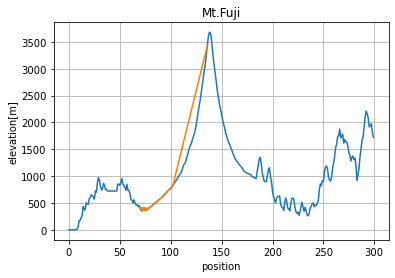

In [6]:
def down_walk(number=136):
    '''
    山を下る関数
    ---
    引数
    number: 開始の地点
    ---
    戻り値
    list_Mt_down :移動毎の地点のリスト
    '''
    list_Mt_down =[number]
    list_Mt_Hi =[hyouko_nda[number]]
    #while True:
    for i in range(30):
        list_Mt_down.append(next(list_Mt_down[-1]))
        list_Mt_Hi.append(hyouko_nda[list_Mt_down[-1]])

    return list_Mt_down,list_Mt_Hi

number = 136

down_line,down_hi= down_walk(number)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()

【問題6】初期値の変更

In [10]:
def down_walk(number):
    '''
    山を下る関数
    ---
    引数
    number: 開始の地点
    ---
    戻り値
    list_Mt_down :移動毎の地点のリスト
    '''
    list_Mt_down =[number]
    list_Mt_Hi =[hyouko_nda[number]]
    try:
        for i in range(30):
            list_Mt_down.append(next(list_Mt_down[-1]))
            list_Mt_Hi.append(hyouko_nda[list_Mt_down[-1]])
    except:
        print("error")
    finally:
        return list_Mt_down,list_Mt_Hi

number = 100  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

[100, 96, 90, 87, 83, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74]


In [17]:
number = 142  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

[142, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178]


In [14]:
number = 50  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

[50, 54, 57, 35, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]


【問題7】初期値ごとの下山過程の可視化

[100, 96, 90, 87, 83, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74]


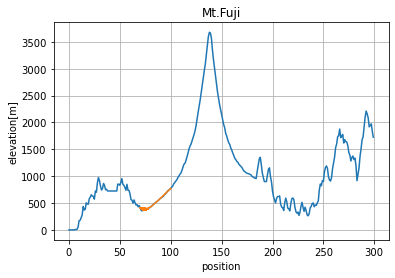

In [12]:
number = 100  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()

[142, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178, 180, 185, 157, 168, 172, 177, 178]


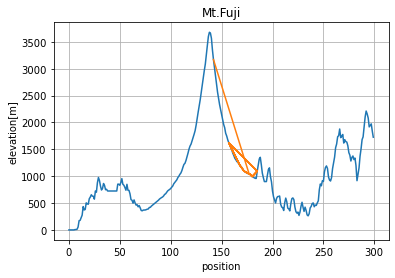

In [18]:
number = 142  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()

[50, 54, 57, 35, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]


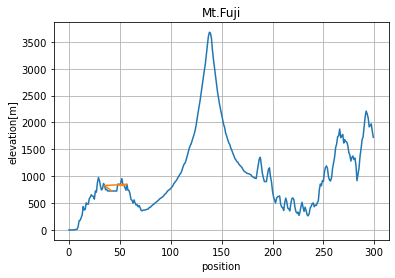

In [16]:
number = 50  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更

alpha = 0.4 と 0.01で試行　　地点は[136]

[136, 68, 84, 77, 73, 67, 64, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]


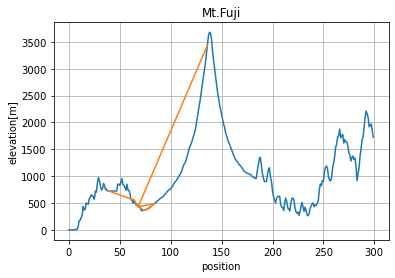

In [20]:
def next(number):
    '''
    今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数
    ---
    引数:
    number: 指定した地点の番号
    ---
    戻り値:
    point: 移動先の地点の番号
    '''
    alpha = 0.4
    point = int(bangou_nda[number] - (alpha)*(koubai(number)))
    if point < 0:
        print("ERROR")
    else:
        return point

#print(next(136))


def down_walk(number):
    '''
    山を下る関数
    ---
    引数
    number: 開始の地点
    ---
    戻り値
    list_Mt_down :移動毎の地点のリスト
    '''
    list_Mt_down =[number]
    list_Mt_Hi =[hyouko_nda[number]]
    try:
        for i in range(30):
            list_Mt_down.append(next(list_Mt_down[-1]))
            list_Mt_Hi.append(hyouko_nda[list_Mt_down[-1]])
    except:
        print("error")
    finally:
        return list_Mt_down,list_Mt_Hi

number = 136  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()

[136, 134, 132, 130, 128, 126, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100]


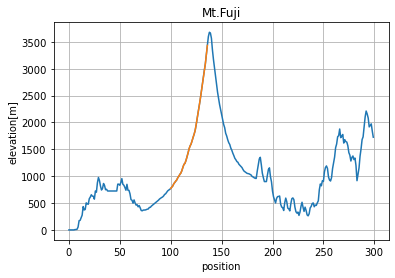

In [21]:
def next(number):
    '''
    今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数
    ---
    引数:
    number: 指定した地点の番号
    ---
    戻り値:
    point: 移動先の地点の番号
    '''
    alpha = 0.01
    point = int(bangou_nda[number] - (alpha)*(koubai(number)))
    if point < 0:
        print("ERROR")
    else:
        return point

#print(next(136))


def down_walk(number):
    '''
    山を下る関数
    ---
    引数
    number: 開始の地点
    ---
    戻り値
    list_Mt_down :移動毎の地点のリスト
    '''
    list_Mt_down =[number]
    list_Mt_Hi =[hyouko_nda[number]]
    try:
        for i in range(30):
            list_Mt_down.append(next(list_Mt_down[-1]))
            list_Mt_Hi.append(hyouko_nda[list_Mt_down[-1]])
    except:
        print("error")
    finally:
        return list_Mt_down,list_Mt_Hi

number = 136  #変更可能な値

down_line,down_hi= down_walk(number)
print(down_line)

import matplotlib.pyplot as plt
%matplotlib inline
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)    #格子を描写
plt.plot(bangou_nda,hyouko_nda)  #X軸にXリストを、Y軸にYリストを反映
plt.plot(down_line,down_hi)
plt.show()